In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("ufo-sightings-scrubbed.csv")

C:\Users\BILAL\AppData\Local\Temp\ipykernel_23376\3935299781.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ufo-sightings-scrubbed.csv")


In [5]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df = df.dropna(subset=['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.day_name()

In [6]:
df.isnull().sum()
df = df.drop(['comments','duration (seconds)','duration (hours/min)','date posted'], axis=1, errors='ignore')

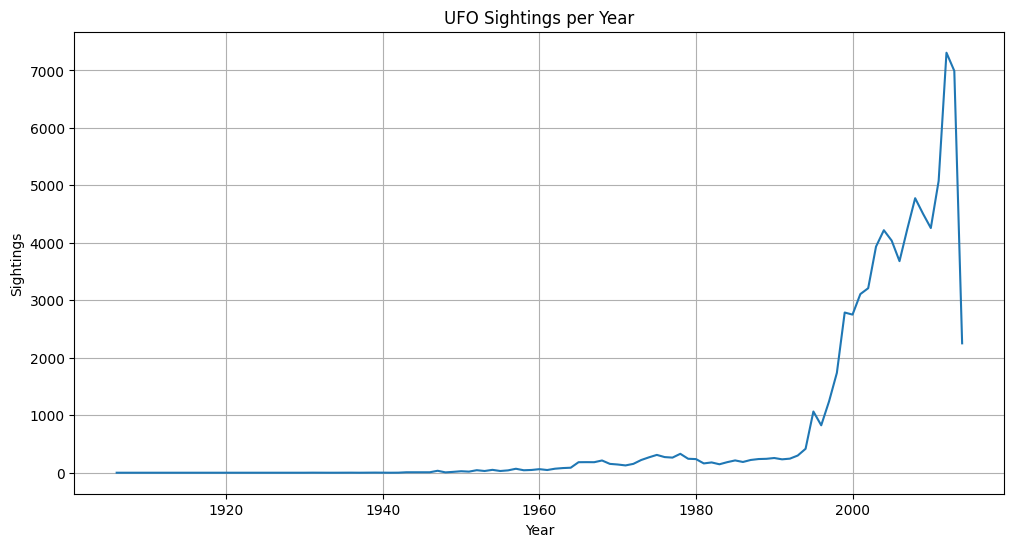

In [7]:
yearly_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.plot(yearly_counts)
plt.title('UFO Sightings per Year')
plt.xlabel('Year')
plt.ylabel('Sightings')
plt.grid(True)
plt.show()

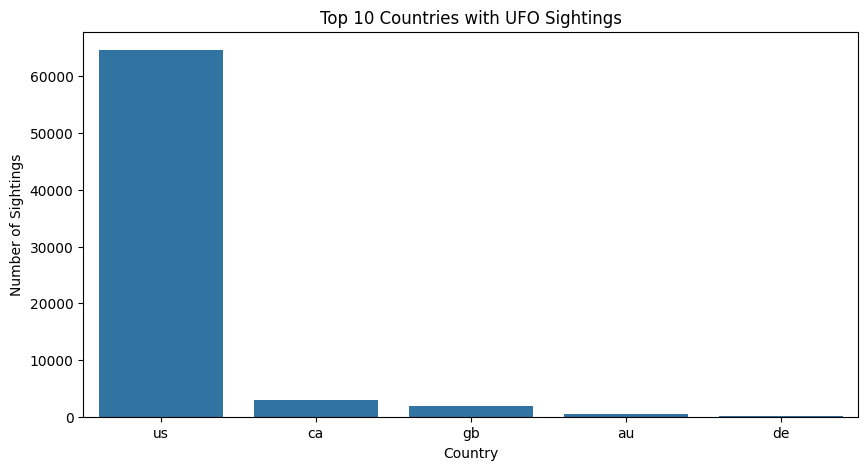

In [8]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries with UFO Sightings')
plt.ylabel('Number of Sightings')
plt.xlabel('Country')
plt.show()

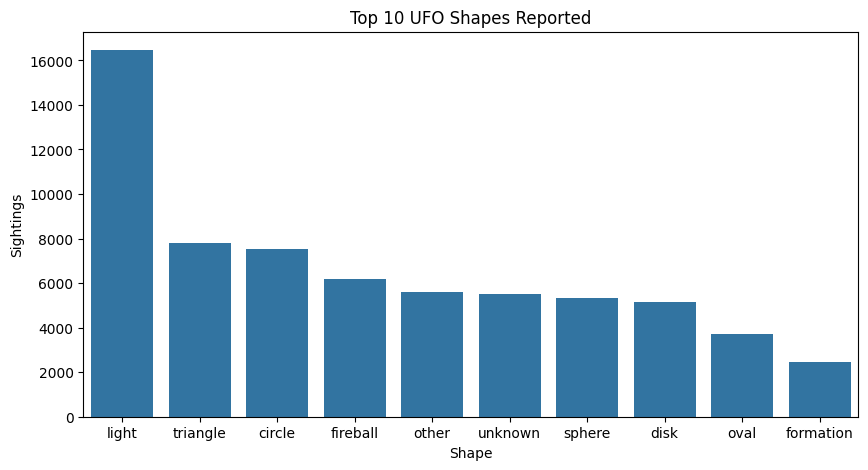

In [9]:
top_shapes = df['shape'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_shapes.index, y=top_shapes.values)
plt.title('Top 10 UFO Shapes Reported')
plt.ylabel('Sightings')
plt.xlabel('Shape')
plt.show()

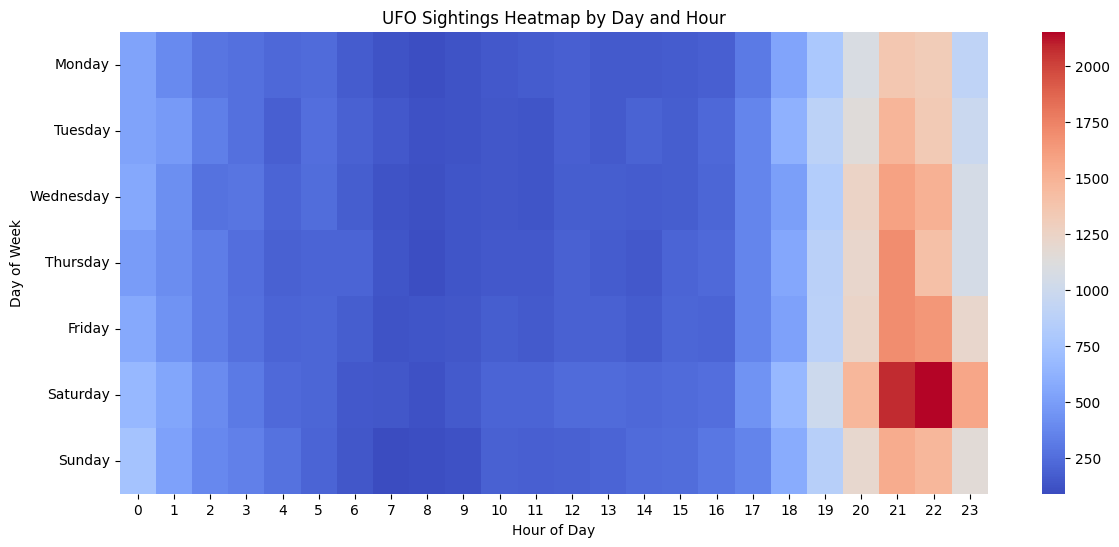

In [10]:
heatmap_data = df.groupby(['dayofweek', 'hour']).size().unstack().fillna(0)
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
heatmap_data = heatmap_data.reindex(days_order)
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title('UFO Sightings Heatmap by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

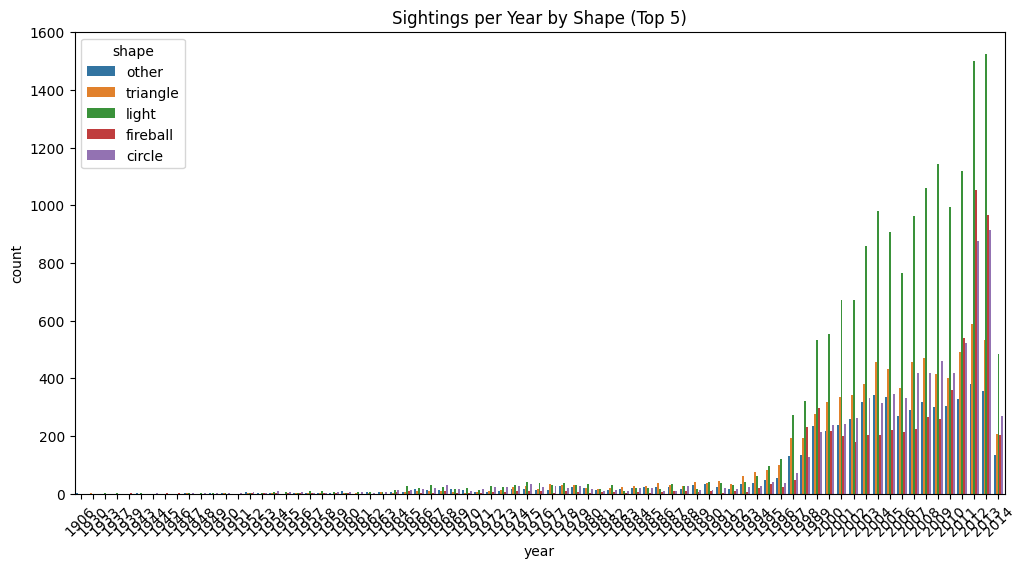

In [11]:
top_shapes = df['shape'].value_counts().nlargest(5).index
filtered = df[df['shape'].isin(top_shapes)]
plt.figure(figsize=(12,6))
sns.countplot(data=filtered, x='year', hue='shape')
plt.title('Sightings per Year by Shape (Top 5)')
plt.xticks(rotation=45)
plt.show()